In [1]:
from ipynb.fs.full.Population import Population
from ipynb.fs.full.Simulation import Simulation
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy import signal
import time

In [2]:
def calc_fitness(agent, points):
    dist = 0
    for i in range(len(points)-1):
        dist += np.linalg.norm(points[agent][i] - points[agent][i+1])
    return (0 - dist)

In [48]:
def plot_agents(pop):
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    for agent in pop.agents:
        ax.plot(pop.points[:,0][agent], pop.points[:,1][agent], alpha=0.1)
    return fig

def path_length(points, path):
    dist = 0
    points = points[path]
    for i in range(len(points)-1):
        dist += distance(points[i], points[i+1])
    return dist

def baseline_path(points):
    paths = []
    for ind, point in enumerate(points):
        visited = np.zeros(shape=(points.shape[0]))
        visited[ind] = 1
        path = []
        path.append(ind)
        currInd = ind
        for i in range(len(points[visited==0])):
            nearestPoint = points[visited==0][np.argmin([np.linalg.norm(points[currInd] - x) for x in points[visited==0]])]
            currInd = np.where(points == nearestPoint)[0]
            path.append(currInd[0])
            visited[currInd] = 1

        paths.append(path)
    return paths[np.argmin([path_length(points, path) for path in paths])]

def distance(x1, x2):
        return np.linalg.norm(x1-x2)

In [168]:
n_epochs = 2000

x = np.arange(0, n_epochs, 1)
uniqueness_value = 0.5
mutation_chance = 0.02

In [226]:
n_epochs = 1000
mutation_values = np.zeros(shape=n_epochs)
z = 20
for i in range(z):
    mutation_values[round(n_epochs/z)*i:] = (((z-2)/z) ** i)*(0.99 ** np.arange(0,n_epochs-(round(n_epochs/z)*i)))/50
    
mutation_values += 0.02

Text(0.5, 1.0, 'Mutation Rate')

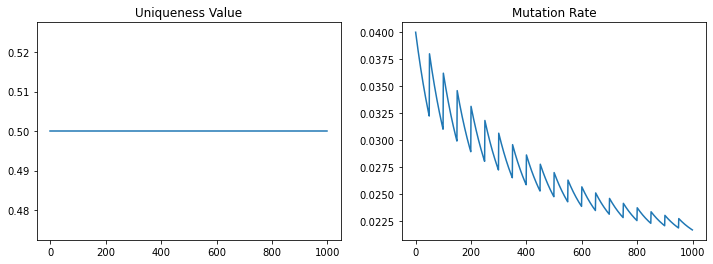

In [227]:
n_agents = 100
period = 10
Unique_max = 0.5
Mutation_max = 0.02
x = np.arange(0, n_epochs, 1)
uniqueness_value = np.ones(shape=n_epochs) * Unique_max
#uniqueness_value = signal.square(2 * np.pi * x / period, duty=0.5) * Unique_max/3 + Unique_max
#mutation_values = signal.square(2 * np.pi * x / period, duty=0.5) * Mutation_max/3 + Mutation_max
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(x, uniqueness_value)
ax[0].set_title("Uniqueness Value")
ax[1].plot(x, mutation_values)
ax[1].set_title("Mutation Rate")

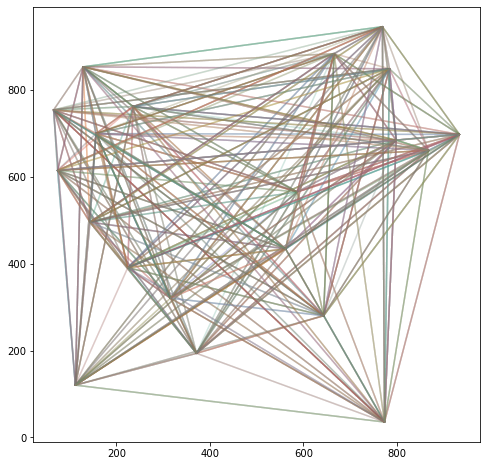

In [228]:
sim = Simulation(calc_fitness)
testPop = Population(agent_length=20, num_agents=n_agents, bounds=(0,1000), num_genes=1)
testPop.define_visualization_function(plot_agents)
testPop.display()

In [229]:
completed = 0
startTime = time.time()
for i in range(n_epochs):
    #gen_mutation_rate = 1 #sine(i, period=125, max=0.01, offset = -25)
    #uniqueness_value = exponentialsine(i, period=250, exponent=4, max=1.25, offset = 100)
    
    nextGen, fitness, diversity = sim.next_generation(testPop, mutation_rate=mutation_values[i], value_diversity = uniqueness_value[i], show_fitness = True, show_diversity = True)
    testPop.next_generation(nextGen, fitness, diversity)
    
    #if completed%round(n_epochs/1000) == 0:
        #testPop.save_img(str(testPop.epoch).zfill(5))
    
    clear_output(wait=True)
    completed += 1
    if i%10 == 0:
        print(f'{i}/{n_epochs} completed:\t|{"="*round(40 * i/n_epochs)}|{"-" * round(40 * (n_epochs-i)/n_epochs)}|\t{round(((time.time() - startTime)/completed) * (n_epochs-completed), 1)}s remaining')
    
print('Completed!')

ValueError: min() arg is an empty sequence

Text(0.5, 1.0, 'Best Solution found vs epoch')

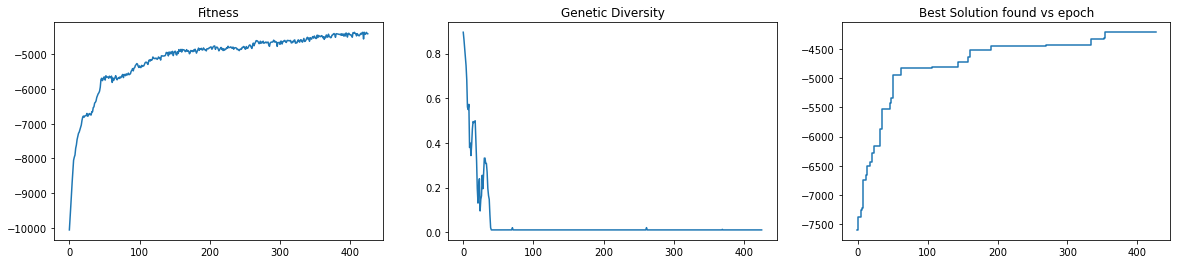

In [230]:
fig, ax = plt.subplots(1,3,figsize=(20,4))
ax[0].plot(np.arange(0, len(testPop.fitness_history)), testPop.fitness_history)
ax[0].set_title('Fitness')
ax[1].plot(np.arange(0, len(testPop.diversity_history)), testPop.diversity_history)
ax[1].set_title('Genetic Diversity')
#ax[2].step(np.array(sim.best_agents, dtype=object)[:,2], np.array(sim.best_agents, dtype=object)[:,1])
ax[2].step(np.append(np.array(sim.best_agents, dtype=object)[:,2], len(testPop.diversity_history)), np.append(np.array(sim.best_agents, dtype=object)[:,1], max(np.array(sim.best_agents, dtype=object)[:,1])))
ax[2].set_title('Best Solution found vs epoch')
#print(f'Final diversity score: {testPop.diversity_history[-1]}')

ValueError: x and y must have same first dimension, but have shapes (426,) and (1000,)

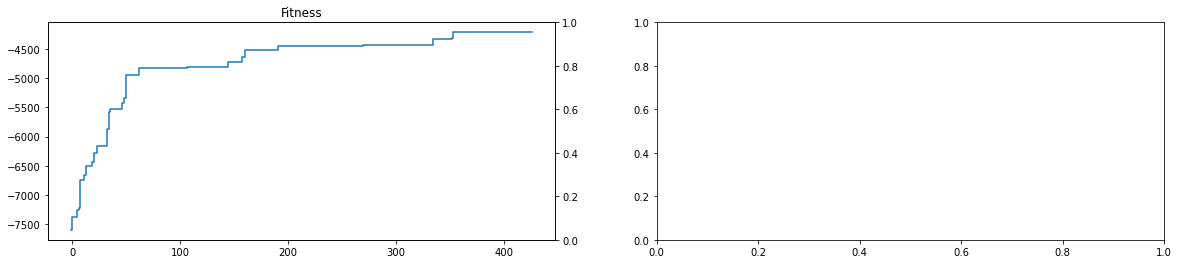

In [231]:
fig, ax = plt.subplots(1,2,figsize=(20,4))
ax[0].step(np.append(np.array(sim.best_agents, dtype=object)[:,2], len(testPop.diversity_history)), np.append(np.array(sim.best_agents, dtype=object)[:,1], max(np.array(sim.best_agents, dtype=object)[:,1])))
ax[0].set_title('Fitness')
ax2 = ax[0].twinx()
ax2.plot(np.arange(0, len(testPop.fitness_history)), mutation_values, color='orange')

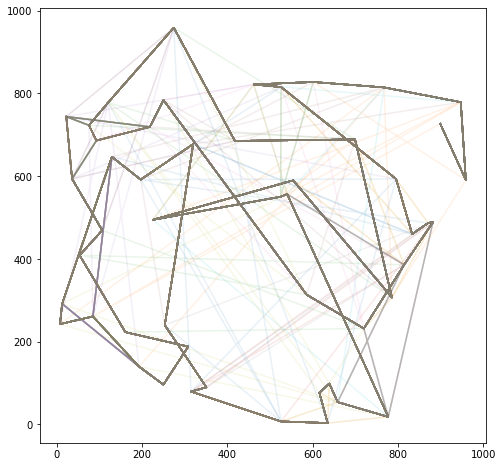

In [217]:
testPop.display()

 Best Fitness: -8327.719739950791


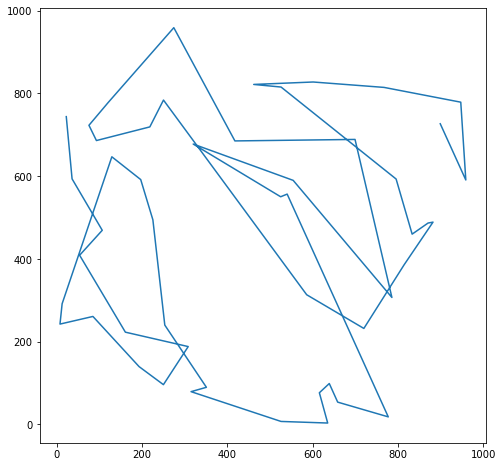

In [218]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(testPop.points[:,0][sim.best_agents[-1][0]], testPop.points[:,1][sim.best_agents[-1][0]])
print(f' Best Fitness: {calc_fitness(sim.best_agents[-1][0], testPop.points)}')
#ax.plot(testPop.points[:,0][sim.best_agents[1][0]], testPop.points[:,1][sim.best_agents[1][0]], alpha=0.5)



Nearest Neighbor Pathfinding Fitness: -5922.727398569441


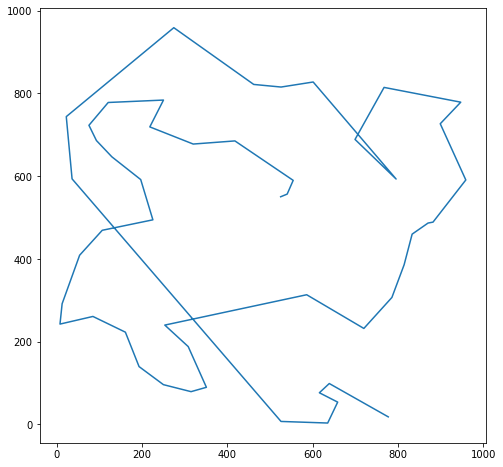

In [219]:
baseline = baseline_path(testPop.points)
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(testPop.points[:,0][baseline], testPop.points[:,1][baseline])
print(f'Nearest Neighbor Pathfinding Fitness: {calc_fitness(baseline, testPop.points)}')
#ax.plot(testPop.points[:,0][sim.best_agents[1][0]], testPop.points[:,1][sim.best_agents[1][0]], alpha=0.5)

In [184]:
import cv2
import os

In [185]:
image_folder = './Output'
video_name = 'Output.mp4'

images = [img for img in os.listdir(image_folder)]
#images.remove('.ipynb_checkpoints')

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 60, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

print(f'Finished converting {len(images)} images into video')

Finished converting 1000 images into video
